Predictive Insights in Real Estate: Advanced Modeling Strategies for Accurate Price Forecasting

This dataset has been sourced from magicbricks.com. It offers a comprehensive compilation of real estate details, encompassing numerous variables related to residential properties. It provides insights into property characteristics like (area, latitude, longitude, Bedrooms, Bathrooms, Balcony, Status, neworold parking, Furnished_status, Lift, Landmarks, type_of_building, desc, and Price_sqft). With a wealth of information, the dataset facilitates an in-depth exploration of the relationships between these variables and the ultimate sale price (Price) of the properties. This dataset can be utilised as a valuable tool for constructing a predictive model, and enhancing decision-making for various stakeholders in the real estate market, including homebuyers, sellers, and industry professionals.

Dataset Description

1.Price: The target variable representing the property's price.
2.Address: The location of the property.
3.Area: The size of the property in square feet.
4.Latitude: The geographic coordinate of the property.
5.Longitude: The geographic coordinate of the property.
6.Bedrooms: The number of bedrooms in the property.
7.Bathrooms: The number of bathrooms in the property.
8.Balcony: Indicates the number of balconies the property has.
9.Status: Indicates whether the property is under construction or ready.
10.neworold: Indicates whether the property is new or old.
11.Parking: Indicates the parking availability.
12.Furnished Status: Indicates whether the property is fully furnished, semi-furnished or unfurnished.
13.Lift: Indicates the total no of lifts.
14.Landmarks: Significant nearby locations or features.
15.Type of Building: The architectural type of the property.
16.Description: Additional information about the property.
17.Price per Sqft: The price of the property per square foot.


In [80]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error , r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import learning_curve


In [81]:
# Read dataset 
data = pd.read_csv('archive\Delhi_v2.csv')
data.head()

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7408\1948925769.py:2: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv('archive\Delhi_v2.csv')


,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [82]:
# Finding null values 
round(data.isnull().sum()/(data.shape[0])*100, 2)

Unnamed: 0           0.00
price                0.00
Address              0.00
area                 0.00
latitude             0.00
longitude            0.00
Bedrooms             0.00
Bathrooms            0.00
Balcony             33.24
Status               7.42
neworold             0.00
parking             66.24
Furnished_status    46.70
Lift                77.60
Landmarks           64.34
type_of_building     0.00
desc                 0.00
Price_sqft           0.00
dtype: float64

In [83]:
# Dropping the unnecessary columns
data.drop(columns=['Landmarks','Unnamed: 0','desc','Lift','Address'],axis=1,inplace=True)

In [84]:
# Null of Furnished_status -> Unfurnished	
# Null of Balcony  -> 0
# Null of parking -> for not-null value =1 , null value =0
# Null of furnished_status -> Unfurnished
data['Status'] = data['Status'].fillna('Under Construction')
data['Balcony'] = data['Balcony'].fillna(0)
data['parking'] = data['parking'].apply(lambda value: 0 if pd.isnull(value) else 1 if value > 0 else value)
data['Furnished_status'].fillna('Unfurnished', inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7408\3622557279.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Furnished_status'].fillna('Unfurnished', inplace=True)


In [85]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
columns = ['Status','neworold','Furnished_status','type_of_building']
for col in columns:
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])
data['parking'] = data['parking'].apply(lambda value: 0 if pd.isnull(value) else 1 if value > 0 else value)
# Parking column is talking about avialability rather than providing count of parking so i mapped value greater than 0 as 1 which means parking is available 
# and 0 if the parking is not available



In [86]:
data['latitude']=round(data['latitude'],2)
data['longitude']=round(data['longitude'],2)
data['Price_sqft']=round(data['Price_sqft'],2)

In [87]:
#Scaling all the columns
min_max_scaler = MinMaxScaler()
data[data.select_dtypes(include=['float64','int64']).columns] = min_max_scaler.fit_transform(data.select_dtypes(include=['float64','int64']))

**SIMPLE LINEAR REGRESSION ->**

In [88]:
#Separate features (X) and target variable (y)
X = data.drop(columns=['price'])  # Drop the target variable column from features
y = data['price']  # Select the target variable column

# Initialize the estimator (e.g., Linear Regression)
estimator = LinearRegression()

# Initialize RFE
rfe = RFE(estimator, n_features_to_select=5)  # You can change the number of features as needed

# Fit RFE
rfe.fit(X, y)

# Get feature rankings
feature_rankings = pd.DataFrame({'Feature': X.columns, 'Rank': rfe.ranking_})

# Sort features by rank
feature_rankings_sorted = feature_rankings.sort_values(by='Rank')

print("Feature rankings:")
print(feature_rankings_sorted)

Feature rankings:
             Feature  Rank
0               area     1
1           latitude     1
3           Bedrooms     1
5            Balcony     1
11        Price_sqft     1
2          longitude     2
4          Bathrooms     3
8            parking     4
9   Furnished_status     5
7           neworold     6
10  type_of_building     7
6             Status     8


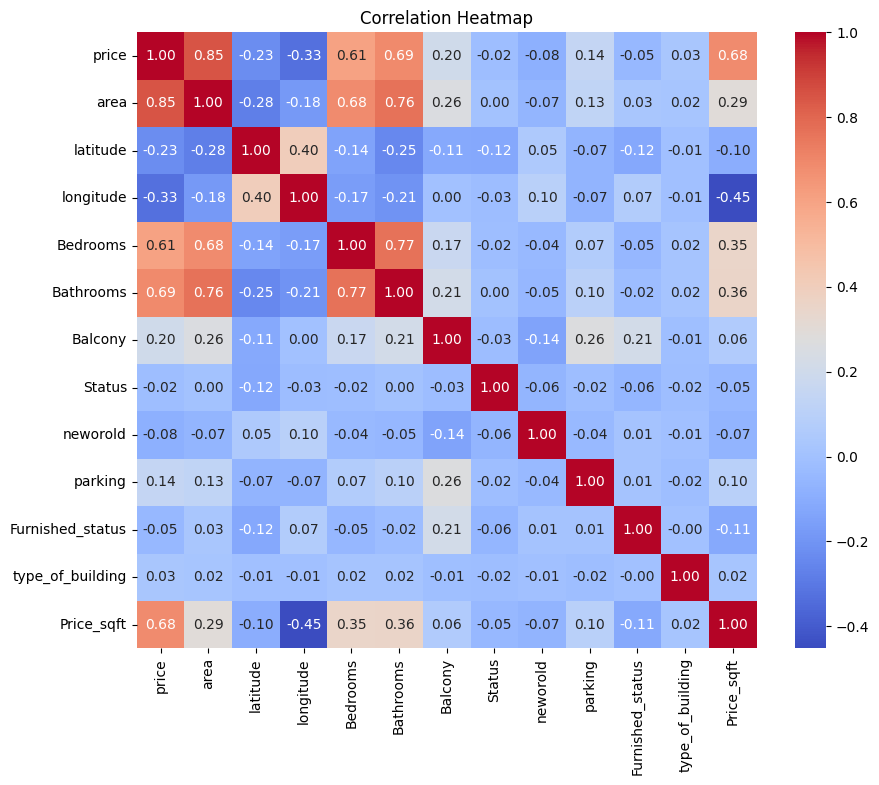

In [94]:
import seaborn as sns
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [89]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Define a range of values for n to experiment with
n_values = [2,4,6,8,10,12]  # Example values, adjust as needed

# Dictionary to store mean squared error for each value of n
mse_values = {}

# Loop over each value of n
for n in n_values:
    # Initialize RFE with the Linear Regression model and n features to select
    rfe = RFE(estimator=model, n_features_to_select=n)
    
    # Fit RFE to training data
    rfe.fit(X_train, y_train)
    
    # Get selected features
    selected_features = X_train.columns[rfe.support_]
    
    # Train model using selected features and perform cross-validation
    cv_scores = cross_val_score(estimator=model, X=X_train[selected_features], y=y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Calculate mean squared error
    mean_mse = -cv_scores.mean()
    
    # Store mean squared error for this value of n
    mse_values[n] = mean_mse

# Choose the value of n with the lowest mean squared error
best_n = min(mse_values, key=mse_values.get)
best_mse = mse_values[best_n]
print("Best value of n:", best_n)

# Train final model using the best value of n
final_rfe = RFE(estimator=model, n_features_to_select=best_n)
final_rfe.fit(X_train, y_train)
selected_features_final = X_train.columns[final_rfe.support_]
final_model = model.fit(X_train[selected_features_final], y_train)

# Use the corresponding selected features of X_test
X_test_selected = X_test[selected_features_final]

# Evaluate final model on test set
test_predictions = final_model.predict(X_test_selected)
r_squared = r2_score(y_test, test_predictions)
print("R-squared:", r_squared)

Best value of n: 6
R-squared: 0.9167725140485319


**Ridge Regression ->**

In [90]:
# Define a range of alpha values to search
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# Initialize Ridge and Lasso Regression models
ridge_model = Ridge()
lasso_model = Lasso()

# Perform GridSearchCV for Ridge Regression
ridge_grid = GridSearchCV(estimator=ridge_model, param_grid={'alpha': alphas}, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train[selected_features_final], y_train)
print("Best alpha for Ridge:", ridge_grid.best_params_)

# Perform GridSearchCV for Lasso Regression
lasso_grid = GridSearchCV(estimator=lasso_model, param_grid={'alpha': alphas}, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train[selected_features_final], y_train)
print("Best alpha for Lasso:", lasso_grid.best_params_)

# Get the best alpha for Ridge and Lasso
best_alpha_ridge = ridge_grid.best_params_['alpha']
best_alpha_lasso = lasso_grid.best_params_['alpha']

# Initialize Ridge and Lasso Regression models with best alpha
ridge_model_best = Ridge(alpha=best_alpha_ridge)
lasso_model_best = Lasso(alpha=best_alpha_lasso)

# Fit the models on the training data
ridge_model_best.fit(X_train[selected_features_final], y_train)
lasso_model_best.fit(X_train[selected_features_final], y_train)

# Extracting selected features for Ridge Regression
selected_features_ridge = [feature for feature, coef in zip(X.columns, ridge_model_best.coef_) if coef != 0]
# Extracting selected features for Lasso Regression
selected_features_lasso = [feature for feature, coef in zip(X.columns, lasso_model_best.coef_) if coef != 0]


# Predict on the test data
Y_pred_ridge = ridge_model_best.predict(X_test[selected_features_final])
Y_pred_lasso = lasso_model_best.predict(X_test[selected_features_final])
print("Selected features for Ridge Regression:", selected_features_ridge)
print("Selected features for Lasso Regression:", selected_features_lasso)



Best alpha for Ridge: {'alpha': 0.01}
Best alpha for Lasso: {'alpha': 0.001}
Selected features for Ridge Regression: ['area', 'latitude', 'longitude', 'Bedrooms', 'Bathrooms', 'Balcony']
Selected features for Lasso Regression: ['area', 'longitude', 'Balcony']


In [91]:
# Evaluate the Ridge model
r_squared_ridge = r2_score(y_test, Y_pred_ridge)
print("Ridge Regression:")
print("R-squared:", r_squared_ridge)

# Evaluate the Lasso model
r_squared_lasso = r2_score(y_test, Y_pred_lasso)
print("\nLasso Regression:")
print("R-squared:", r_squared_lasso)

Ridge Regression:
R-squared: 0.9167514335948072

Lasso Regression:
R-squared: 0.8515272798038453


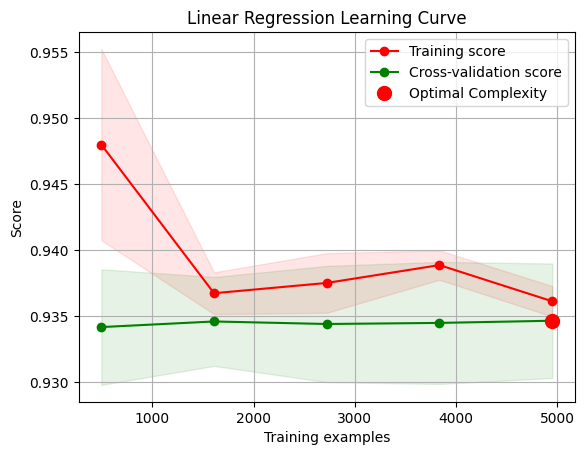

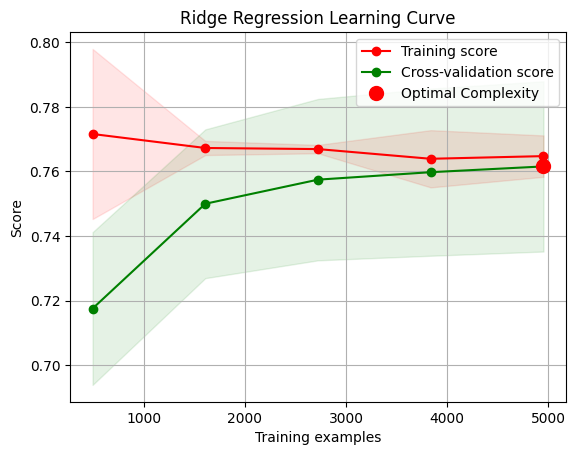

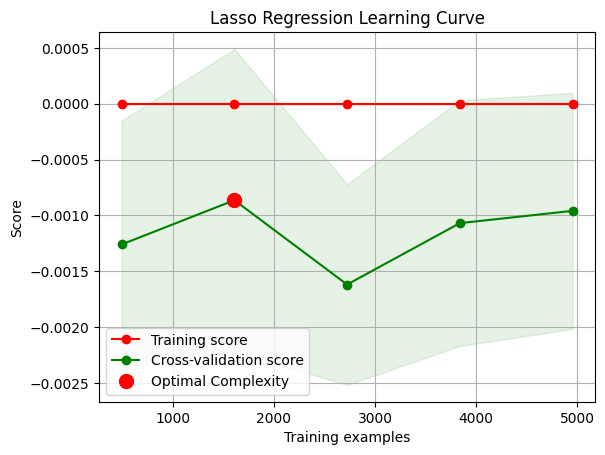

In [92]:
def plot_learning_curves(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    # Find the point of optimal complexity (maximize cross-validation score)
    optimal_complexity_index = np.argmax(test_scores_mean)
    optimal_complexity_train_size = train_sizes[optimal_complexity_index]
    optimal_complexity_cv_score = test_scores_mean[optimal_complexity_index]

    plt.plot(optimal_complexity_train_size, optimal_complexity_cv_score, 'ro', markersize=10, label="Optimal Complexity")

    plt.legend(loc="best")
    return plt

# Plot learning curves for each model
plot_learning_curves(model, "Linear Regression Learning Curve", X_train[selected_features_final], y_train, cv=5)
plot_learning_curves(ridge_model, "Ridge Regression Learning Curve", X_train[selected_features_ridge], y_train, cv=5)
plot_learning_curves(lasso_model, "Lasso Regression Learning Curve", X_train[selected_features_lasso], y_train, cv=5)

plt.show()

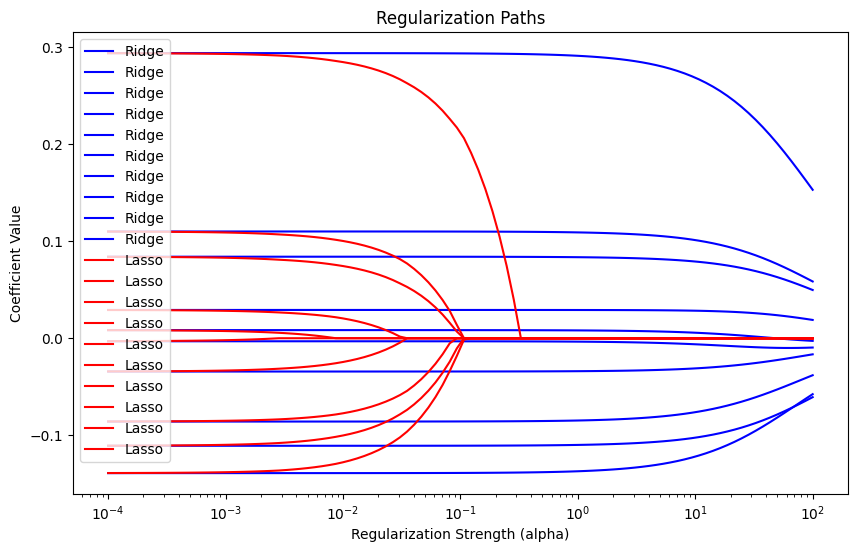

In [93]:
# Generate some synthetic data
np.random.seed(0)
X = np.random.randn(100, 10)  # 100 samples, 10 features
y = np.random.randn(100)

# Define a range of alpha values
alphas = np.logspace(-4, 2, 100)

# Initialize Ridge and Lasso regression models
ridge_model = Ridge()
lasso_model = Lasso()

# Initialize arrays to store coefficients
ridge_coefs = []
lasso_coefs = []

# Fit models for each alpha and store coefficients
for alpha in alphas:
    ridge_model.set_params(alpha=alpha)
    ridge_model.fit(X, y)
    ridge_coefs.append(ridge_model.coef_)

    lasso_model.set_params(alpha=alpha)
    lasso_model.fit(X, y)
    lasso_coefs.append(lasso_model.coef_)

# Plot regularization paths
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_coefs, label='Ridge', color='blue')
plt.plot(alphas, lasso_coefs, label='Lasso', color='red')
plt.xscale('log')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Coefficient Value')
plt.title('Regularization Paths')
plt.legend()
plt.show()